# Exploratory Data Analysis

## Loading the data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

In [2]:
cat_directory = './data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
cat # the arrival times cataloged

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
...,...,...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,63780.0,evid00156,impact_mq
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,65700.0,evid00191,impact_mq
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,36300.0,evid00192,impact_mq
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,57780.0,evid00196,impact_mq


ModuleNotFoundError: No module named 'tensorflow'

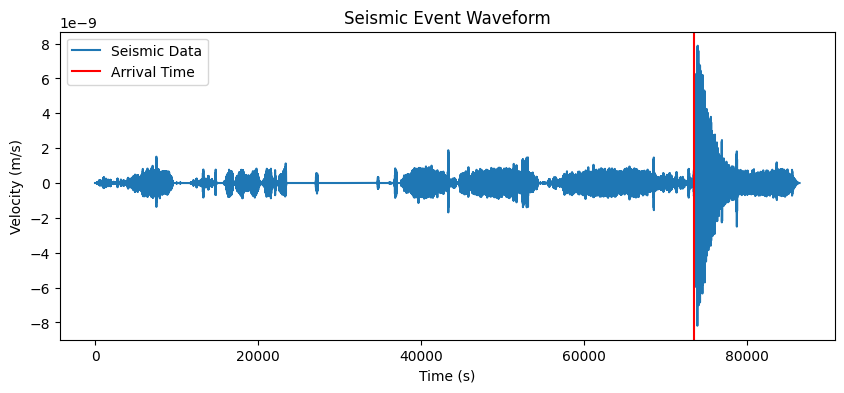

In [16]:
# Load the specific seismic data file corresponding to a seismic event
def load_seismic_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Plot the waveform of the seismic event
def plot_waveform(data, arrival_time_rel):
    time_rel = data['time_rel(sec)']
    velocity = data['velocity(m/s)']
    
    plt.figure(figsize=(10, 4))
    plt.plot(time_rel, velocity, label='Seismic Data')
    plt.axvline(arrival_time_rel, color='red', linestyle='-', label='Arrival Time')
    plt.title('Seismic Event Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (m/s)')
    plt.legend()
    plt.show()

# Example usage with first event in the catalog
# print(cat.iloc[0])
row = cat.iloc[0]
file_path = f'./data/lunar/training/data/S12_GradeA/{row.filename}.csv'
seismic_data = load_seismic_data(file_path)

# Plot the waveform of the event
plot_waveform(seismic_data, row["time_rel(sec)"])